In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
import qutip.testing as qt

Write down a general function using the built-in plot_wigner function to visualize the Wigner function in 2D and 3D for a given state $\ket \psi$

<Figure size 9600x6400 with 0 Axes>

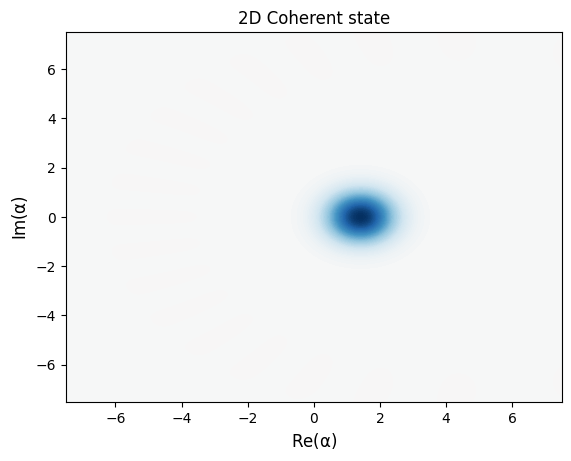

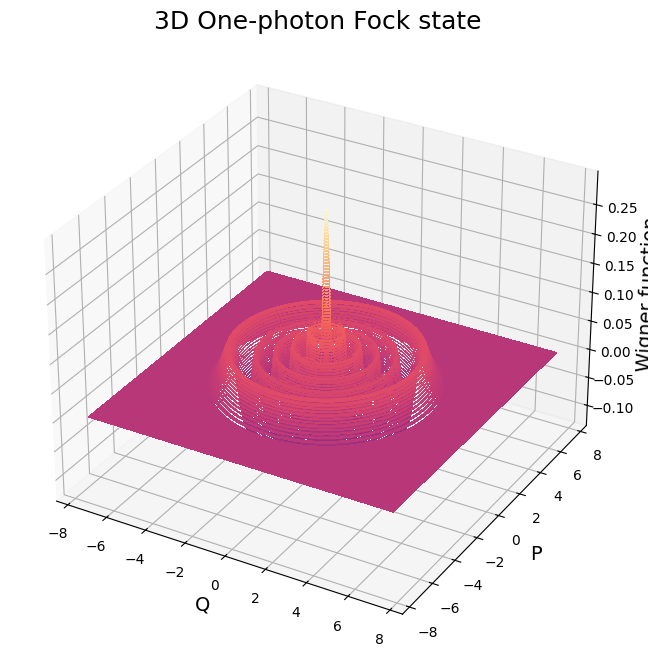

In [44]:
fig = plt.figure(figsize=(12, 8), dpi=800)

#plotting a 2D coherent state density
alpha = coherent_dm(20, 1)
plot_wigner(alpha)
plt.title(rf"2D Coherent state")
plt.show()

#plotting ten photon mixed state
fock_1 = basis(20, 10)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
plot_wigner(fock_1, fig=fig, ax=ax, cmap = "magma")
ax.set_xlabel('Q', fontsize=14)
ax.set_ylabel('P', fontsize=14)
ax.set_zlabel('Wigner function', fontsize=14)
plt.title(r"3D One-photon Fock state", fontsize=18)
plt.show()

We see the coherent state is just a displaced single photon fock state. The single photon state has negative probability in the origin.

The Fock state $\ket n$ is defined using the built-in function basis(N,n) for a Fock space of length N. In this exercise we assume a Fock space of length $N = 20$.

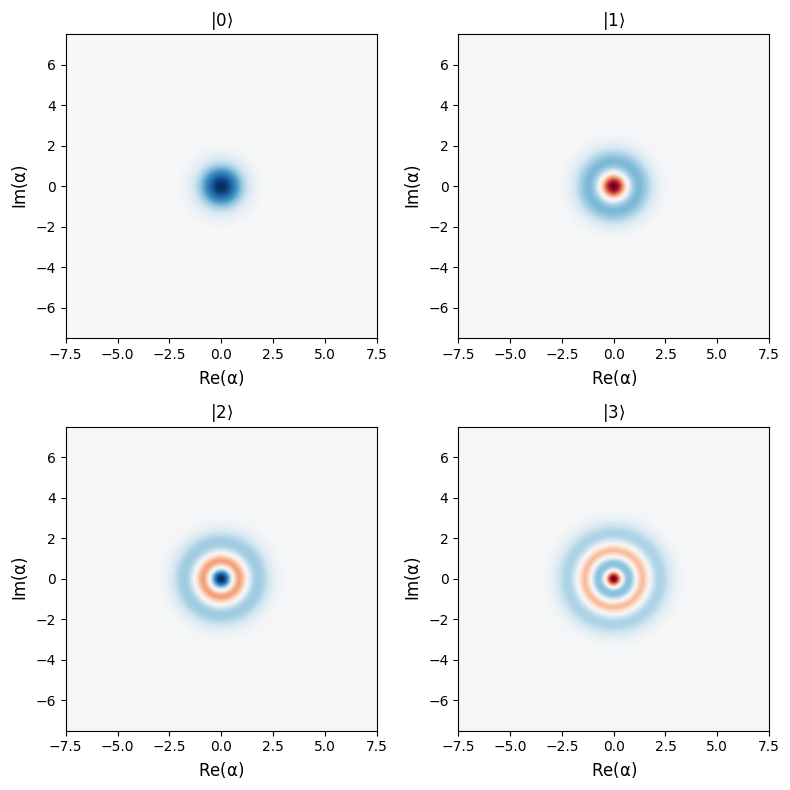

In [21]:
N = 20  # Number of basis states

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

# Loop over Fock states |n⟩ for n=0,1,2,3
for n, ax in zip([0, 1, 2, 3], axes):
    state = basis(N, n)  # Create Fock state |n⟩
    plot_wigner(state, fig=fig, ax=ax)
    ax.set_title(r"$|{n}\rangle$".format(n=n))

fig.tight_layout()
plt.show()

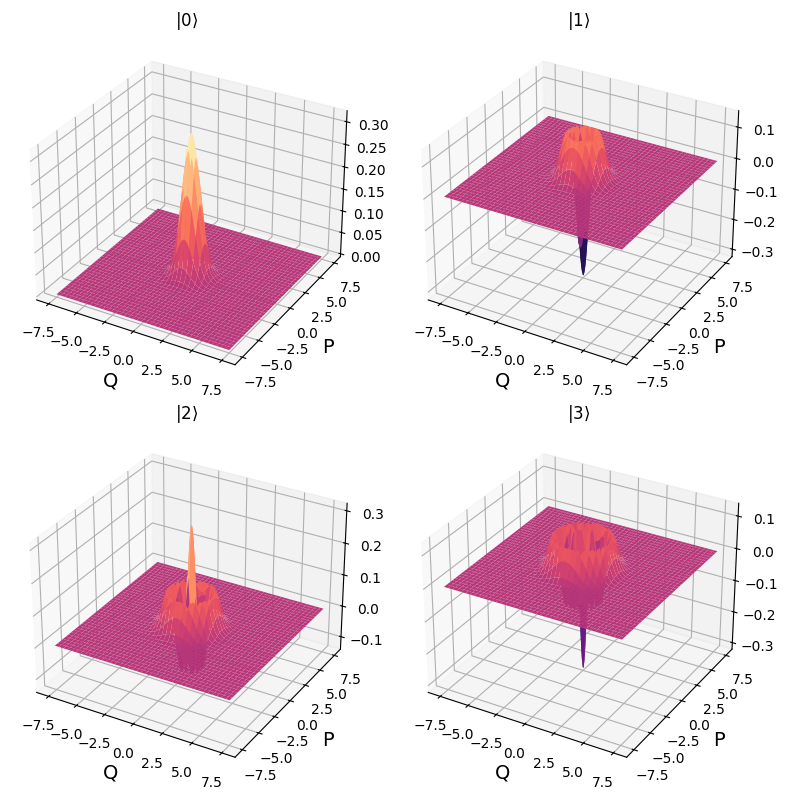

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), subplot_kw={'projection': '3d'})
axes = axes.flatten()

for n, ax in zip([0, 1, 2, 3], axes):
    state = basis(N, n)
    plot_wigner(state, fig=fig, ax=ax, cmap="magma", projection='3d') 
    ax.set_title(r"$|{n}\rangle$".format(n=n))
    ax.set_xlabel('Q', fontsize=14)
    ax.set_ylabel('P', fontsize=14)

fig.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
plot_wigner(fock_1, fig=fig, ax=ax, cmap = "magma")
ax.set_xlabel('Q', fontsize=14)
ax.set_ylabel('P', fontsize=14)
ax.set_zlabel('Wigner function', fontsize=14)
plt.title(r"3D One-photon Fock state", fontsize=18)

The coherent state $\ket \alpha$ is defined using the built-in function coherent(N,α), where $N$ is similar to part (2). Plot the Wigner function of a coherent state $\ket \alpha$ for $\alpha = 2$ and $\alpha = -2$

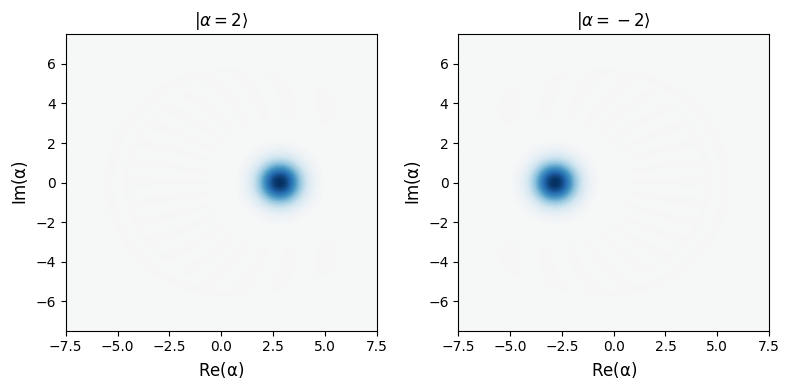

In [22]:
N = 20  # Hilbert space dimension
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Create coherent states with alpha = 2 and alpha = -2
a_2 = coherent(N, 2)
a_minus2 = coherent(N, -2)

plot_wigner(a_2, fig=fig, ax=axes[0])
axes[0].set_title(r"$|\alpha = 2\rangle$")

plot_wigner(a_minus2, fig=fig, ax=axes[1])
axes[1].set_title(r"$|\alpha = -2\rangle$")

fig.tight_layout()
plt.show()

It is clear that the coherent state is a displaced vacuum state. In the first we see its displaced by $\hat D(\alpha=2)$ and vice versa for the second one. We can generate the vacuum state and apply the displacement operator after as seen below.

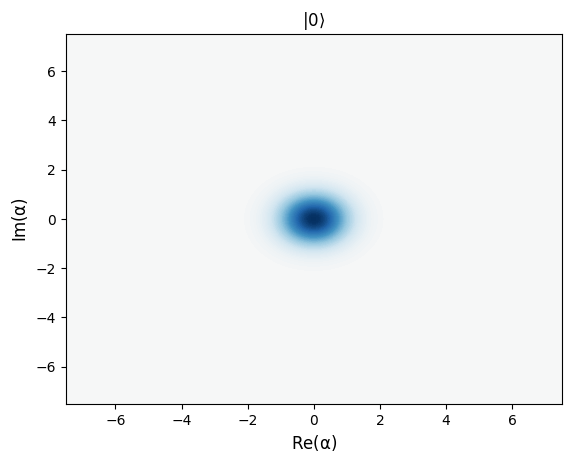

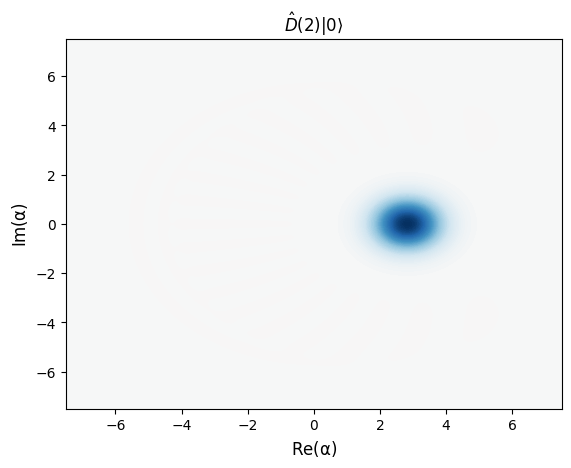

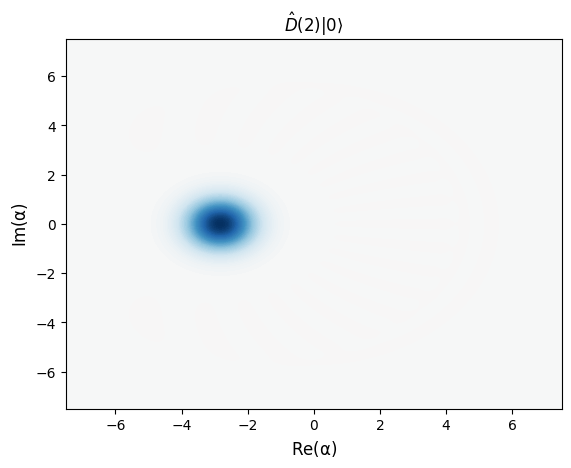

In [69]:
vacuum = basis(N, 0)
D_2 = displace(N, 2)
D_minus2 = displace(N, -2)

plot_wigner(vacuum)
plt.title(r"$| 0 \rangle$")
plot_wigner(D_2 @ vacuum)
plt.title(r"$\hat D(2) | 0 \rangle$")
plot_wigner(D_minus2 @ vacuum)
plt.title(r"$\hat D(2) | 0 \rangle$")
plt.show()

In quantum mechanics a cat state is a quantum state that is a superposition of two diametrically opposed states at the same time, such as the possibilities that a cat be alive and dead at the same time (Schrödinger's cat). In quantum optics a Schrödinger cat state is composed of two coherent states with opposite phases $\ket \alpha$ and $\ket{-\alpha}$:

\begin{equation}
\ket{cat} = \frac{\ket \alpha + \ket{-\alpha}}{\sqrt{2}}
\end{equation}

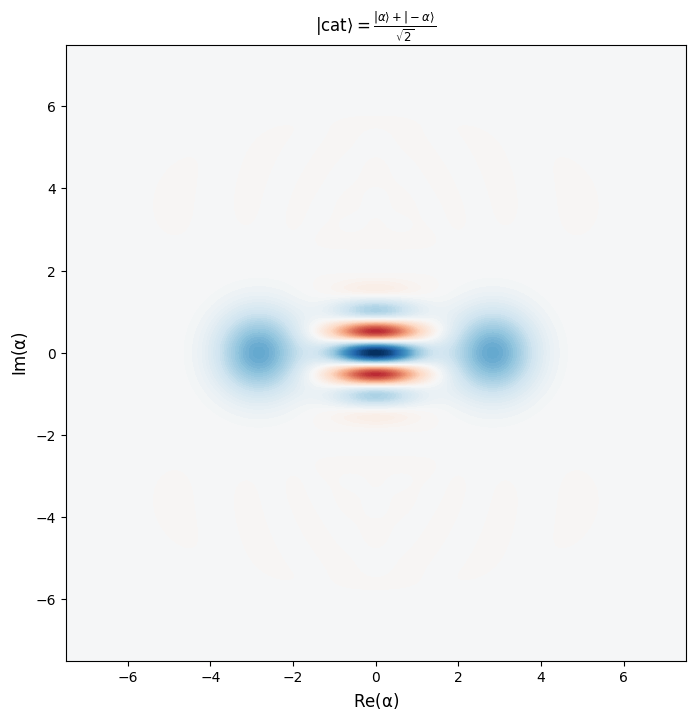

In [48]:
# Create the cat state |cat> = (|alpha> + |-alpha>) / sqrt(2)
cat_state = (a_2 + a_minus2).unit() 
fig, ax = plt.subplots(figsize=(8, 8))
plot_wigner(cat_state, fig=fig, ax=ax)
ax.set_title(r"$|\text{cat} \rangle = \frac{|\alpha\rangle + |-\alpha\rangle}{\sqrt{2}}$")
plt.show()